# T2 TAGD - Patryck e Lucca Santos

## Análise exploratória
O csv foi editado, foram tirados todos os dados com o valor `NaN` em colunas numéricas, no seu lugar, foi colocado o valor `0`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('weatherAUS.csv',sep = ',')
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,0.0,0.0,W,44,W,...,22,1007.7,1007.1,8,0,16.9,21.8,No,0.0,No
1,12/2/2008,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44,NNW,...,25,1010.6,1007.8,0,0,17.2,24.3,No,0.0,No
2,12/3/2008,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46,W,...,30,1007.6,1008.7,0,2,21.0,23.2,No,0.0,No
3,12/4/2008,Albury,9.2,28.0,0.0,0.0,0.0,NE,24,SE,...,16,1017.6,1012.8,0,0,18.1,26.5,No,1.0,No
4,12/5/2008,Albury,17.5,32.3,1.0,0.0,0.0,W,41,ENE,...,33,1010.8,1006.0,7,8,17.8,29.7,No,0.2,No
5,12/6/2008,Albury,14.6,29.7,0.2,0.0,0.0,WNW,56,W,...,23,1009.2,1005.4,0,0,20.6,28.9,No,0.0,No
6,12/7/2008,Albury,14.3,25.0,0.0,0.0,0.0,W,50,SW,...,19,1009.6,1008.2,1,0,18.1,24.6,No,0.0,No
7,12/8/2008,Albury,7.7,26.7,0.0,0.0,0.0,W,35,SSE,...,19,1013.4,1010.1,0,0,16.3,25.5,No,0.0,No
8,12/9/2008,Albury,9.7,31.9,0.0,0.0,0.0,NNW,80,SE,...,9,1008.9,1003.6,0,0,18.3,30.2,No,1.4,Yes
9,12/10/2008,Albury,13.1,30.1,1.4,0.0,0.0,W,28,S,...,27,1007.0,1005.7,0,0,20.1,28.2,Yes,0.0,No


## Atributos escolhidos
Os atributos foram divididos em 2 grupos, atributos numéricos e atributos categóricos. Coluna que não acrescentavam valor para o estudo, como a de identificador e data não foram mapeadas.

In [3]:
nomes_atributos_numericos   = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                              'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                               'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

nomes_atributos_categoricos = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

print(nomes_atributos_numericos)
print(nomes_atributos_categoricos)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


### Separação dos dados de treino e teste
Foram separados os dados de treino e teste e foi definida a coluna alvo (RainTomorrow).

In [4]:
from sklearn.model_selection import train_test_split

# separando os conjuntos de dados de treino e teste
df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=42)

# separando a coluna alvo do conjunto de treino
df_treino_labels = df_treino['RainTomorrow'].copy()
df_treino        = df_treino.drop(columns='RainTomorrow')

# separando a coluna alvo do conjunto de teste
df_teste_labels = df_teste['RainTomorrow'].copy()
df_teste        = df_teste.drop(columns='RainTomorrow')

### Processo de pré-processamento

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

pipeline_atr_numericos = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

preproc_completo = ColumnTransformer([
    ('numericos',   pipeline_atr_numericos, nomes_atributos_numericos),
    ('categoricos', OneHotEncoder(),        nomes_atributos_categoricos),
    ], 
    sparse_threshold=0)

# pre-processamento do conjunto de treino
X_treino = preproc_completo.fit_transform(df_treino)

# pre-processamento do conjunto de teste
X_teste = preproc_completo.transform(df_teste)

# pre-processamento da coluna alvo para treno
y_treino = df_treino_labels.values == 'Yes'

# pre-processamento da coluna alvo para teste
y_teste = df_teste_labels.values == 'Yes'

In [6]:
X_treino.shape

(113754, 119)

In [7]:
y_treino.shape

(113754,)

In [8]:
X_teste.shape

(28439, 119)

In [9]:
y_teste.shape

(28439,)

## Treinamento

## Regressão logística
Usamos a regressão logística, assim como feito em aula, para comparação dos dados com os das redes neurais.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_treino, y_treino)

y_previsto = log_reg.predict(X_teste)

print("Acurácia: ", accuracy_score(y_teste,y_previsto))
print("Precisão: ", precision_score(y_teste,y_previsto))
print("Recall:   ", recall_score(y_teste,y_previsto))
print("F1 Score: ", f1_score(y_teste,y_previsto))

Acurácia:  0.8414149583318682
Precisão:  0.7067991868082223
Recall:    0.49345529096357044
F1 Score:  0.5811664190193165


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(20,4))
mlp_clf.fit(X_treino, y_treino)

y_previsto = mlp_clf.predict(X_teste)
print("MLP:")
print("Acurácia: ", accuracy_score(y_teste,y_previsto))
print("Precisão: ", precision_score(y_teste,y_previsto))
print("Recall:   ", recall_score(y_teste,y_previsto))
print("F1 Score: ", f1_score(y_teste,y_previsto))

MLP:
Acurácia:  0.8561130841450121
Precisão:  0.7250350210126075
Recall:    0.5713609840719129
F1 Score:  0.6390897865584759


In [15]:
import tensorflow as tf
from tensorflow import keras
tf.__version__, keras.__version__

('2.1.0', '2.2.4-tf')

In [16]:
X_treino.shape[1:]

(119,)

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(20, activation="relu",input_shape=X_treino.shape[1:]))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(2, activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                2400      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total params: 2,862
Trainable params: 2,862
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Para modelos de classificação com saída esparsa:    # para classificação com saída densa  # para classificação binária:     
model.compile(loss="sparse_categorical_crossentropy", # usar categorical_crossentropy       # usar binary_crossentropy e mudar
              optimizer="sgd",                        #                                     # a ativação da camada de saída
              metrics=["accuracy"])                   #                                     # para sigmoid

# Para modelos de regressão deixar a última camada com um
# único neurônio sem ativação e usar loss="mean_squared_error"

# Sobre os otimizadores, sugiro a seguinte leitura complementar: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [21]:
history = model.fit(X_treino, y_treino, epochs=10, validation_split=0.2)

Train on 91003 samples, validate on 22751 samples
Epoch 1/10
91003/91003 [==============================] - 11s 122us/sample - loss: 0.4077 - accuracy: 0.8233 - val_loss: 0.3779 - val_accuracy: 0.8370
Epoch 2/10
91003/91003 [==============================] - 10s 110us/sample - loss: 0.3707 - accuracy: 0.8409 - val_loss: 0.3668 - val_accuracy: 0.8404
Epoch 3/10
91003/91003 [==============================] - 10s 110us/sample - loss: 0.3622 - accuracy: 0.8443 - val_loss: 0.3616 - val_accuracy: 0.8423
Epoch 4/10
91003/91003 [==============================] - 10s 112us/sample - loss: 0.3575 - accuracy: 0.8458 - val_loss: 0.3581 - val_accuracy: 0.8435
Epoch 5/10
91003/91003 [==============================] - 10s 110us/sample - loss: 0.3544 - accuracy: 0.8480 - val_loss: 0.3552 - val_accuracy: 0.8455
Epoch 6/10
91003/91003 [==============================] - 10s 113us/sample - loss: 0.3521 - accuracy: 0.8484 - val_loss: 0.3537 - val_accuracy: 0.8469
Epoch 7/10
91003/91003 [====================

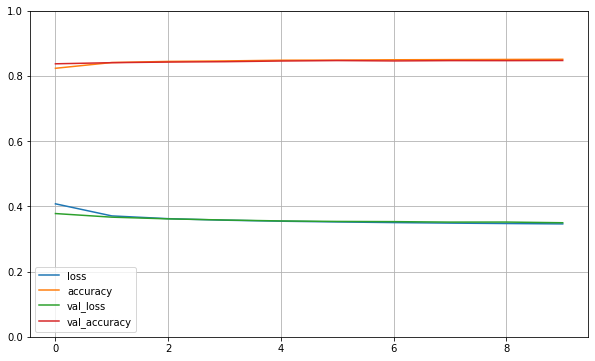

In [22]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
y_previsto_rna_proba = model.predict(X_teste)

In [24]:
np.round(y_previsto_rna_proba,decimals=2)

array([[0.19, 0.81],
       [0.55, 0.45],
       [0.97, 0.03],
       ...,
       [0.98, 0.02],
       [0.98, 0.02],
       [0.96, 0.04]], dtype=float32)

In [25]:
y_previsto_rna = model.predict_classes(X_teste)
y_previsto_rna

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
print("RNA:")
print("Acurácia: ", accuracy_score(y_teste,y_previsto_rna))
print("Precisão: ", precision_score(y_teste,y_previsto_rna))
print("Recall:   ", recall_score(y_teste,y_previsto_rna))
print("F1 Score: ", f1_score(y_teste,y_previsto_rna))

RNA:
Acurácia:  0.8493266289250677
Precisão:  0.7323688969258589
Recall:    0.5109604163381171
F1 Score:  0.6019507663725036


Train on 91003 samples, validate on 22751 samples
Epoch 1/100
91003/91003 [==============================] - 15s 162us/sample - loss: 0.4026 - accuracy: 0.8246 - val_loss: 0.3738 - val_accuracy: 0.8386
Epoch 2/100
91003/91003 [==============================] - 14s 154us/sample - loss: 0.3635 - accuracy: 0.8441 - val_loss: 0.3621 - val_accuracy: 0.8437
Epoch 3/100
91003/91003 [==============================] - 14s 151us/sample - loss: 0.3544 - accuracy: 0.8478 - val_loss: 0.3553 - val_accuracy: 0.8459
Epoch 4/100
91003/91003 [==============================] - 14s 153us/sample - loss: 0.3490 - accuracy: 0.8497 - val_loss: 0.3549 - val_accuracy: 0.8479
Epoch 5/100
91003/91003 [==============================] - 14s 151us/sample - loss: 0.3451 - accuracy: 0.8510 - val_loss: 0.3502 - val_accuracy: 0.8472
Epoch 6/100
91003/91003 [==============================] - 14s 149us/sample - loss: 0.3421 - accuracy: 0.8524 - val_loss: 0.3542 - val_accuracy: 0.8446
Epoch 7/100
91003/91003 [=============

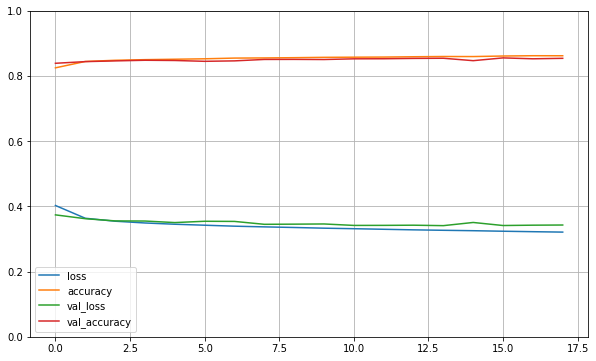

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation="relu",input_shape=X_treino.shape[1:]))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(2, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

history = model.fit(X_treino, y_treino, epochs=100, validation_split=0.2,callbacks=[early_stopping_cb])

print("RNA:")
print("Acurácia: ", accuracy_score(y_teste,y_previsto_rna))
print("Precisão: ", precision_score(y_teste,y_previsto_rna))
print("Recall:   ", recall_score(y_teste,y_previsto_rna))
print("F1 Score: ", f1_score(y_teste,y_previsto_rna))

pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
def MLPKerasTF(hidden_layer_sizes=(20),activation="relu"):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=X_treino.shape[1:]))
    for units in hidden_layer_sizes:
        model.add(keras.layers.Dense(units,activation=activation))
    model.add(keras.layers.Dense(2, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    model.summary()
    print("activation=",activation)
    return model

mlpKerasTF_clf = keras.wrappers.scikit_learn.KerasClassifier(MLPKerasTF)

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'hidden_layer_sizes': [(10,), (20,), (20,20), (50,50), (20,10,5), (40,20,5), (100,50,10)],
  'activation': ['sigmoid', 'tanh', 'relu']},
 ]

grid_search = GridSearchCV(mlpKerasTF_clf, param_grid)
grid_search.fit(X_treino, y_treino, epochs=10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                1200      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 22        
Total params: 1,222
Trainable params: 1,222
Non-trainable params: 0
_________________________________________________________________
activation= sigmoid
Train on 91003 samples
Epoch 1/10
91003/91003 [==============================] - 9s 103us/sample - loss: 0.4436 - accuracy: 0.7990
Epoch 2/10
91003/91003 [==============================] - 8s 92us/sample - loss: 0.3990 - accuracy: 0.8289
Epoch 3/10
91003/91003 [==============================] - 9s 97us/sample - loss: 0.3893 - accuracy: 0.8346
Epoch 4/10
91003/91003 [==============================] - 8s 93us/sample - loss: 0.3838 - accuracy: 0.8372
Epoch 5/10
91003/91003 [==================

91003/91003 [==============================] - 8s 89us/sample - loss: 0.3695 - accuracy: 0.8410
Epoch 10/10
22751/22751 [==============================] - 2s 70us/sample - loss: 0.3701 - accuracy: 0.8447
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 20)                2400      
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 42        
Total params: 2,442
Trainable params: 2,442
Non-trainable params: 0
_________________________________________________________________
activation= sigmoid
Train on 91004 samples
Epoch 1/10
91004/91004 [==============================] - 9s 98us/sample - loss: 0.4403 - accuracy: 0.8038
Epoch 2/10
91004/91004 [==============================] - 9s 94us/sample - loss: 0.3968 - accuracy: 0.8298
Epoch 3/10
91004/91004 [============================

91003/91003 [==============================] - 9s 97us/sample - loss: 0.5144 - accuracy: 0.7766
Epoch 2/10
91003/91003 [==============================] - 8s 90us/sample - loss: 0.4451 - accuracy: 0.7940
Epoch 3/10
91003/91003 [==============================] - 8s 90us/sample - loss: 0.4066 - accuracy: 0.8237
Epoch 4/10
91003/91003 [==============================] - 8s 90us/sample - loss: 0.3959 - accuracy: 0.8301
Epoch 5/10
91003/91003 [==============================] - 8s 90us/sample - loss: 0.3898 - accuracy: 0.8339
Epoch 6/10
91003/91003 [==============================] - 8s 93us/sample - loss: 0.3851 - accuracy: 0.8365
Epoch 7/10
91003/91003 [==============================] - 8s 91us/sample - loss: 0.3815 - accuracy: 0.8384
Epoch 8/10
91003/91003 [==============================] - 8s 90us/sample - loss: 0.3786 - accuracy: 0.8393
Epoch 9/10
91003/91003 [==============================] - 9s 95us/sample - loss: 0.3760 - accuracy: 0.8397
Epoch 10/10
22751/22751 [=======================

91003/91003 [==============================] - 8s 92us/sample - loss: 0.5190 - accuracy: 0.7756
Epoch 4/10
91003/91003 [==============================] - 8s 91us/sample - loss: 0.4918 - accuracy: 0.7756
Epoch 5/10
91003/91003 [==============================] - 9s 94us/sample - loss: 0.4392 - accuracy: 0.7972
Epoch 6/10
91003/91003 [==============================] - 8s 93us/sample - loss: 0.4094 - accuracy: 0.8227
Epoch 7/10
91003/91003 [==============================] - 9s 99us/sample - loss: 0.3992 - accuracy: 0.8281
Epoch 8/10
91003/91003 [==============================] - 9s 96us/sample - loss: 0.3935 - accuracy: 0.8322
Epoch 9/10
91003/91003 [==============================] - 9s 95us/sample - loss: 0.3891 - accuracy: 0.8345
Epoch 10/10
22751/22751 [==============================] - 2s 78us/sample - loss: 0.3815 - accuracy: 0.8392
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   

91004/91004 [==============================] - 10s 105us/sample - loss: 0.5356 - accuracy: 0.7748
Epoch 2/10
91004/91004 [==============================] - 9s 96us/sample - loss: 0.5304 - accuracy: 0.7748
Epoch 3/10
91004/91004 [==============================] - 9s 96us/sample - loss: 0.5254 - accuracy: 0.7748
Epoch 4/10
91004/91004 [==============================] - 9s 97us/sample - loss: 0.5120 - accuracy: 0.7748
Epoch 5/10
91004/91004 [==============================] - 9s 96us/sample - loss: 0.4739 - accuracy: 0.7749
Epoch 6/10
91004/91004 [==============================] - 9s 96us/sample - loss: 0.4251 - accuracy: 0.8047
Epoch 7/10
91004/91004 [==============================] - 10s 108us/sample - loss: 0.4050 - accuracy: 0.8268
Epoch 8/10
91004/91004 [==============================] - 10s 113us/sample - loss: 0.3973 - accuracy: 0.8308
Epoch 9/10
91004/91004 [==============================] - 9s 103us/sample - loss: 0.3923 - accuracy: 0.8331
Epoch 10/10
22750/22750 [================

91003/91003 [==============================] - 12s 132us/sample - loss: 0.5279 - accuracy: 0.7761
Epoch 2/10
91003/91003 [==============================] - 12s 127us/sample - loss: 0.5065 - accuracy: 0.7766
Epoch 3/10
91003/91003 [==============================] - 12s 129us/sample - loss: 0.4485 - accuracy: 0.7907
Epoch 4/10
91003/91003 [==============================] - 12s 128us/sample - loss: 0.4085 - accuracy: 0.8237
Epoch 5/10
91003/91003 [==============================] - 12s 135us/sample - loss: 0.3984 - accuracy: 0.8299
Epoch 6/10
91003/91003 [==============================] - 12s 127us/sample - loss: 0.3929 - accuracy: 0.8329
Epoch 7/10
91003/91003 [==============================] - 12s 127us/sample - loss: 0.3888 - accuracy: 0.8346
Epoch 8/10
91003/91003 [==============================] - 12s 128us/sample - loss: 0.3854 - accuracy: 0.8358
Epoch 9/10
91003/91003 [==============================] - 12s 132us/sample - loss: 0.3826 - accuracy: 0.8377
Epoch 10/10
22751/22751 [=====

91003/91003 [==============================] - 7s 76us/sample - loss: 0.3866 - accuracy: 0.8342
Epoch 2/10
91003/91003 [==============================] - 7s 72us/sample - loss: 0.3668 - accuracy: 0.8429
Epoch 3/10
91003/91003 [==============================] - 6s 70us/sample - loss: 0.3619 - accuracy: 0.8446
Epoch 4/10
91003/91003 [==============================] - 7s 73us/sample - loss: 0.3589 - accuracy: 0.8457
Epoch 5/10
91003/91003 [==============================] - 7s 73us/sample - loss: 0.3566 - accuracy: 0.8467
Epoch 6/10
91003/91003 [==============================] - 7s 74us/sample - loss: 0.3546 - accuracy: 0.8479
Epoch 7/10
91003/91003 [==============================] - 6s 70us/sample - loss: 0.3532 - accuracy: 0.8485
Epoch 8/10
91003/91003 [==============================] - 6s 71us/sample - loss: 0.3517 - accuracy: 0.8490
Epoch 9/10
91003/91003 [==============================] - 7s 72us/sample - loss: 0.3505 - accuracy: 0.8492
Epoch 10/10
22751/22751 [=======================

Epoch 7/10
91003/91003 [==============================] - 7s 73us/sample - loss: 0.3549 - accuracy: 0.8462
Epoch 8/10
91003/91003 [==============================] - 7s 74us/sample - loss: 0.3534 - accuracy: 0.8472
Epoch 9/10
91003/91003 [==============================] - 7s 73us/sample - loss: 0.3521 - accuracy: 0.8476
Epoch 10/10
22751/22751 [==============================] - 1s 59us/sample - loss: 0.3496 - accuracy: 0.8501
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 20)                2400      
_________________________________________________________________
dense_145 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_146 (Dense)            (None, 2)                 42        
Total params: 2,862
Trainable params: 2,862
Non-trainable params: 0
__________________

91003/91003 [==============================] - 7s 82us/sample - loss: 0.4065 - accuracy: 0.8241
Epoch 2/10
91003/91003 [==============================] - 7s 76us/sample - loss: 0.3770 - accuracy: 0.8395
Epoch 3/10
91003/91003 [==============================] - 7s 76us/sample - loss: 0.3677 - accuracy: 0.8421
Epoch 4/10
91003/91003 [==============================] - 8s 84us/sample - loss: 0.3623 - accuracy: 0.8443
Epoch 5/10
91003/91003 [==============================] - 7s 80us/sample - loss: 0.3592 - accuracy: 0.8449
Epoch 6/10
91003/91003 [==============================] - 7s 79us/sample - loss: 0.3566 - accuracy: 0.8465
Epoch 7/10
91003/91003 [==============================] - 7s 79us/sample - loss: 0.3546 - accuracy: 0.8471
Epoch 8/10
91003/91003 [==============================] - 7s 79us/sample - loss: 0.3532 - accuracy: 0.8474
Epoch 9/10
91003/91003 [==============================] - 7s 79us/sample - loss: 0.3518 - accuracy: 0.8480
Epoch 10/10
22751/22751 [=======================

91004/91004 [==============================] - 8s 85us/sample - loss: 0.3941 - accuracy: 0.8301
Epoch 2/10
91004/91004 [==============================] - 7s 79us/sample - loss: 0.3718 - accuracy: 0.8421
Epoch 3/10
91004/91004 [==============================] - 8s 83us/sample - loss: 0.3650 - accuracy: 0.8443
Epoch 4/10
91004/91004 [==============================] - 8s 83us/sample - loss: 0.3607 - accuracy: 0.8460
Epoch 5/10
91004/91004 [==============================] - 7s 78us/sample - loss: 0.3582 - accuracy: 0.8455
Epoch 6/10
91004/91004 [==============================] - 7s 79us/sample - loss: 0.3562 - accuracy: 0.8464
Epoch 7/10
91004/91004 [==============================] - 7s 80us/sample - loss: 0.3543 - accuracy: 0.8474
Epoch 8/10
91004/91004 [==============================] - 7s 79us/sample - loss: 0.3528 - accuracy: 0.8482
Epoch 9/10
91004/91004 [==============================] - 7s 79us/sample - loss: 0.3515 - accuracy: 0.8490
Epoch 10/10
22750/22750 [=======================

91003/91003 [==============================] - 9s 97us/sample - loss: 0.3940 - accuracy: 0.8309
Epoch 2/10
91003/91003 [==============================] - 8s 89us/sample - loss: 0.3690 - accuracy: 0.8414
Epoch 3/10
91003/91003 [==============================] - 8s 87us/sample - loss: 0.3616 - accuracy: 0.8438
Epoch 4/10
91003/91003 [==============================] - 8s 86us/sample - loss: 0.3575 - accuracy: 0.8451
Epoch 5/10
91003/91003 [==============================] - 9s 95us/sample - loss: 0.3546 - accuracy: 0.8464
Epoch 6/10
91003/91003 [==============================] - 8s 91us/sample - loss: 0.3527 - accuracy: 0.8470
Epoch 7/10
91003/91003 [==============================] - 8s 87us/sample - loss: 0.3509 - accuracy: 0.8486
Epoch 8/10
91003/91003 [==============================] - 8s 89us/sample - loss: 0.3493 - accuracy: 0.8493
Epoch 9/10
91003/91003 [==============================] - 8s 89us/sample - loss: 0.3477 - accuracy: 0.8499
Epoch 10/10
22751/22751 [=======================

91003/91003 [==============================] - 11s 119us/sample - loss: 0.3812 - accuracy: 0.8377
Epoch 2/10
91003/91003 [==============================] - 10s 108us/sample - loss: 0.3637 - accuracy: 0.8444
Epoch 3/10
91003/91003 [==============================] - 10s 109us/sample - loss: 0.3581 - accuracy: 0.8462
Epoch 4/10
91003/91003 [==============================] - 10s 109us/sample - loss: 0.3546 - accuracy: 0.8475
Epoch 5/10
91003/91003 [==============================] - 10s 110us/sample - loss: 0.3523 - accuracy: 0.8487
Epoch 6/10
91003/91003 [==============================] - 10s 109us/sample - loss: 0.3500 - accuracy: 0.8495
Epoch 7/10
91003/91003 [==============================] - 10s 113us/sample - loss: 0.3482 - accuracy: 0.8506
Epoch 8/10
91003/91003 [==============================] - 10s 109us/sample - loss: 0.3465 - accuracy: 0.8513
Epoch 9/10
91003/91003 [==============================] - 10s 108us/sample - loss: 0.3449 - accuracy: 0.8520
Epoch 10/10
22751/22751 [=====

22751/22751 [==============================] - 1s 55us/sample - loss: 0.3490 - accuracy: 0.8492
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_240 (Dense)            (None, 20)                2400      
_________________________________________________________________
dense_241 (Dense)            (None, 2)                 42        
Total params: 2,442
Trainable params: 2,442
Non-trainable params: 0
_________________________________________________________________
activation= relu
Train on 91003 samples
Epoch 1/10
91003/91003 [==============================] - 7s 76us/sample - loss: 0.4056 - accuracy: 0.8236
Epoch 2/10
91003/91003 [==============================] - 6s 71us/sample - loss: 0.3732 - accuracy: 0.8403
Epoch 3/10
91003/91003 [==============================] - 7s 71us/sample - loss: 0.3650 - accuracy: 0.8420
Epoch 4/10
91003/91003 [==============================] 

91003/91003 [==============================] - 7s 80us/sample - loss: 0.4056 - accuracy: 0.8244
Epoch 2/10
91003/91003 [==============================] - 7s 74us/sample - loss: 0.3721 - accuracy: 0.8413
Epoch 3/10
91003/91003 [==============================] - 7s 75us/sample - loss: 0.3633 - accuracy: 0.8442
Epoch 4/10
91003/91003 [==============================] - 7s 75us/sample - loss: 0.3578 - accuracy: 0.8461
Epoch 5/10
91003/91003 [==============================] - 7s 75us/sample - loss: 0.3541 - accuracy: 0.8475
Epoch 6/10
91003/91003 [==============================] - 7s 75us/sample - loss: 0.3515 - accuracy: 0.8482
Epoch 7/10
91003/91003 [==============================] - 7s 74us/sample - loss: 0.3497 - accuracy: 0.8488
Epoch 8/10
91003/91003 [==============================] - 7s 75us/sample - loss: 0.3479 - accuracy: 0.8500
Epoch 9/10
91003/91003 [==============================] - 7s 74us/sample - loss: 0.3467 - accuracy: 0.8500
Epoch 10/10
22751/22751 [=======================

91003/91003 [==============================] - 8s 86us/sample - loss: 0.3441 - accuracy: 0.8516
Epoch 8/10
91003/91003 [==============================] - 8s 87us/sample - loss: 0.3425 - accuracy: 0.8522
Epoch 9/10
91003/91003 [==============================] - 8s 86us/sample - loss: 0.3409 - accuracy: 0.8531
Epoch 10/10
22751/22751 [==============================] - 1s 63us/sample - loss: 0.3477 - accuracy: 0.8513
Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_275 (Dense)            (None, 50)                6000      
_________________________________________________________________
dense_276 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_277 (Dense)            (None, 2)                 102       
Total params: 8,652
Trainable params: 8,652
Non-trainable params: 0
_____________________________

91003/91003 [==============================] - 8s 84us/sample - loss: 0.3547 - accuracy: 0.8468
Epoch 5/10
91003/91003 [==============================] - 7s 82us/sample - loss: 0.3505 - accuracy: 0.8487
Epoch 6/10
91003/91003 [==============================] - 7s 82us/sample - loss: 0.3472 - accuracy: 0.8503
Epoch 7/10
91003/91003 [==============================] - 7s 82us/sample - loss: 0.3448 - accuracy: 0.8510
Epoch 8/10
91003/91003 [==============================] - 8s 83us/sample - loss: 0.3428 - accuracy: 0.8524
Epoch 9/10
91003/91003 [==============================] - 8s 82us/sample - loss: 0.3409 - accuracy: 0.8532
Epoch 10/10
22751/22751 [==============================] - 1s 64us/sample - loss: 0.3445 - accuracy: 0.8516
Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_306 (Dense)            (None, 40)                4800      
________________________________________

91004/91004 [==============================] - 10s 112us/sample - loss: 0.3936 - accuracy: 0.8309
Epoch 2/10
91004/91004 [==============================] - 9s 104us/sample - loss: 0.3601 - accuracy: 0.8454
Epoch 3/10
91004/91004 [==============================] - 10s 105us/sample - loss: 0.3518 - accuracy: 0.8485
Epoch 4/10
91004/91004 [==============================] - 10s 106us/sample - loss: 0.3467 - accuracy: 0.8513
Epoch 5/10
91004/91004 [==============================] - 10s 105us/sample - loss: 0.3432 - accuracy: 0.8527
Epoch 6/10
91004/91004 [==============================] - 10s 105us/sample - loss: 0.3402 - accuracy: 0.8533
Epoch 7/10
91004/91004 [==============================] - 10s 105us/sample - loss: 0.3379 - accuracy: 0.8540
Epoch 8/10
91004/91004 [==============================] - 10s 105us/sample - loss: 0.3354 - accuracy: 0.8551
Epoch 9/10
91004/91004 [==============================] - 10s 106us/sample - loss: 0.3335 - accuracy: 0.8565
Epoch 10/10
22750/22750 [======

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000029C54440C88>,
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': ['sigmoid', 'tanh', 'relu'],
                          'hidden_layer_sizes': [(10,), (20,), (20, 20),
                                                 (50, 50), (20, 10, 5),
                                                 (40, 20, 5), (100, 50, 10)]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
grid_search.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (100, 50, 10)}

In [31]:
y_previsto = grid_search.best_estimator_.predict(X_teste)
print("Best MLPKerasTF:")
print("Acurácia: ", accuracy_score(y_teste,y_previsto))
print("Precisão: ", precision_score(y_teste,y_previsto))
print("Recall:   ", recall_score(y_teste,y_previsto))
print("F1 Score: ", f1_score(y_teste,y_previsto))

Best MLPKerasTF:
Acurácia:  0.8535461865747741
Precisão:  0.7231337161607875
Recall:    0.5560637123482101
F1 Score:  0.6286885976642596


## Conclusão 
Com base nos métodos aplicados, ficou claro que o método MLP foi o que apresentou os melhores resultados de acurácia e precisão para o dataset escolhido.